# Things You Should Know Before Becoming an Airbnb Host
## 2021-04-12
## Haotong (James) Li

![caption](files/airbnb.jpeg)
Illustration: Sarah Grillo/Axios

### _Introduction_

> After moving to San Francisco in October 2007, roommates and former schoolmates Brian Chesky and Joe Gebbia came up with the idea of putting an air mattress in their living room and turning it into a bed and breakfast. In February 2008, Nathan Blecharczyk, Chesky's former roommate, joined as the Chief Technology Officer and the third co-founder of the new venture, which they named AirBed & Breakfast.
>
> Now Airbnb, Inc. operates an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in that locale. It currently covers more than 100,000 cities and 220 countries worldwide.
>
> The question is do you want to rent out your home to make money?

### _Business Understanding_

This blog is to interpret the 2016 - 2017's **Boston Airbnb Open Data** to help the potential airbnb host to get a glimpse of Boston's Airbnb market and be able to estimate how much you will earn if you rent out your properties. 

Specifically, this analysis aims to answer below 3 questions:

> 1. What factors affect the rent price? 
>
>
> 2. How competitive is the market based on your neighbourhood, property type and room type?
>
>
> 3. How much should you charge for rent?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%matplotlib inline 
warnings.filterwarnings('ignore')
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
sns.set_style("white")

### _Data Understanding_

There are 3 datasets Boston Airbnb Open Data: **calendar.csv**, **listings.csv** and **reviews.csv**. I plan to use only the first 2 sets in order to answer above business questions.

## I. Dataset Structure: 

### 1. `calendar.csv`

In [2]:
# load df_calendar
df_calendar = pd.read_csv("calendar.csv")
print('Columns: {}'.format(df_calendar.columns.to_list()))
df_calendar.head(3)

Columns: ['listing_id', 'date', 'available', 'price']


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN


In [3]:
# df_calendar overview
print('Shape: {}\n'.format(df_calendar.shape))
print(df_calendar.info())

Shape: (1308890, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None


In [4]:
# Check duplicated rows
df_calendar[df_calendar.duplicated()].count()

listing_id    365
date          365
available     365
price          80
dtype: int64

In [5]:
# Check for NULLs
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         665853
dtype: int64

### 2. `listings.csv`

In [6]:
df_listing = pd.read_csv("listings.csv")
print('Columns: {}'.format(df_listing.columns.to_list()))
df_listing.head(3)

Columns: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [7]:
# df_listing overview
print('Shape: {}\n'.format(df_listing.shape))
print(df_listing.info())

Shape: (3585, 95)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url        

In [8]:
# Check duplicated rows
df_listing.duplicated().any()

False

In [9]:
# Check for NULLs
print(df_listing.isnull().sum())

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host_location                         11
host_about      

## II. Exploratory Analysis

### 1. What factors affect the rent price?
#### Data Cleaning

In [10]:
# Select factors to be analyzed from df_listing
df_listing_factor = df_listing[['id','price','neighbourhood_cleansed','property_type','room_type',
                                'accommodates','bathrooms','bedrooms','beds','bed_type','review_scores_rating']]
# Convert price column type to float and drop $ sign
df_listing_factor['price'] = df_listing_factor['price'].astype('str')
df_listing_factor['price'] = df_listing_factor['price'].map(lambda p: float(p.replace('$', '').replace(',','')))

# Create review_scores_rating_tier column
for x in np.linspace(0,100,11):
    df_listing_factor.loc[(df_listing_factor['review_scores_rating'] >= x) & (df_listing_factor['review_scores_rating'] < x+10), 'review_scores_rating_tier'] = int(x)

df_listing_factor.head(3)

,id,price,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,review_scores_rating,review_scores_rating_tier
0,12147973,250.0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,NaN,NaN
1,3075044,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,94.0,90.0
2,6976,65.0,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,98.0,90.0


In [11]:
df_listing_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 12 columns):
id                           3585 non-null int64
price                        3585 non-null float64
neighbourhood_cleansed       3585 non-null object
property_type                3582 non-null object
room_type                    3585 non-null object
accommodates                 3585 non-null int64
bathrooms                    3571 non-null float64
bedrooms                     3575 non-null float64
beds                         3576 non-null float64
bed_type                     3585 non-null object
review_scores_rating         2772 non-null float64
review_scores_rating_tier    2772 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 336.2+ KB


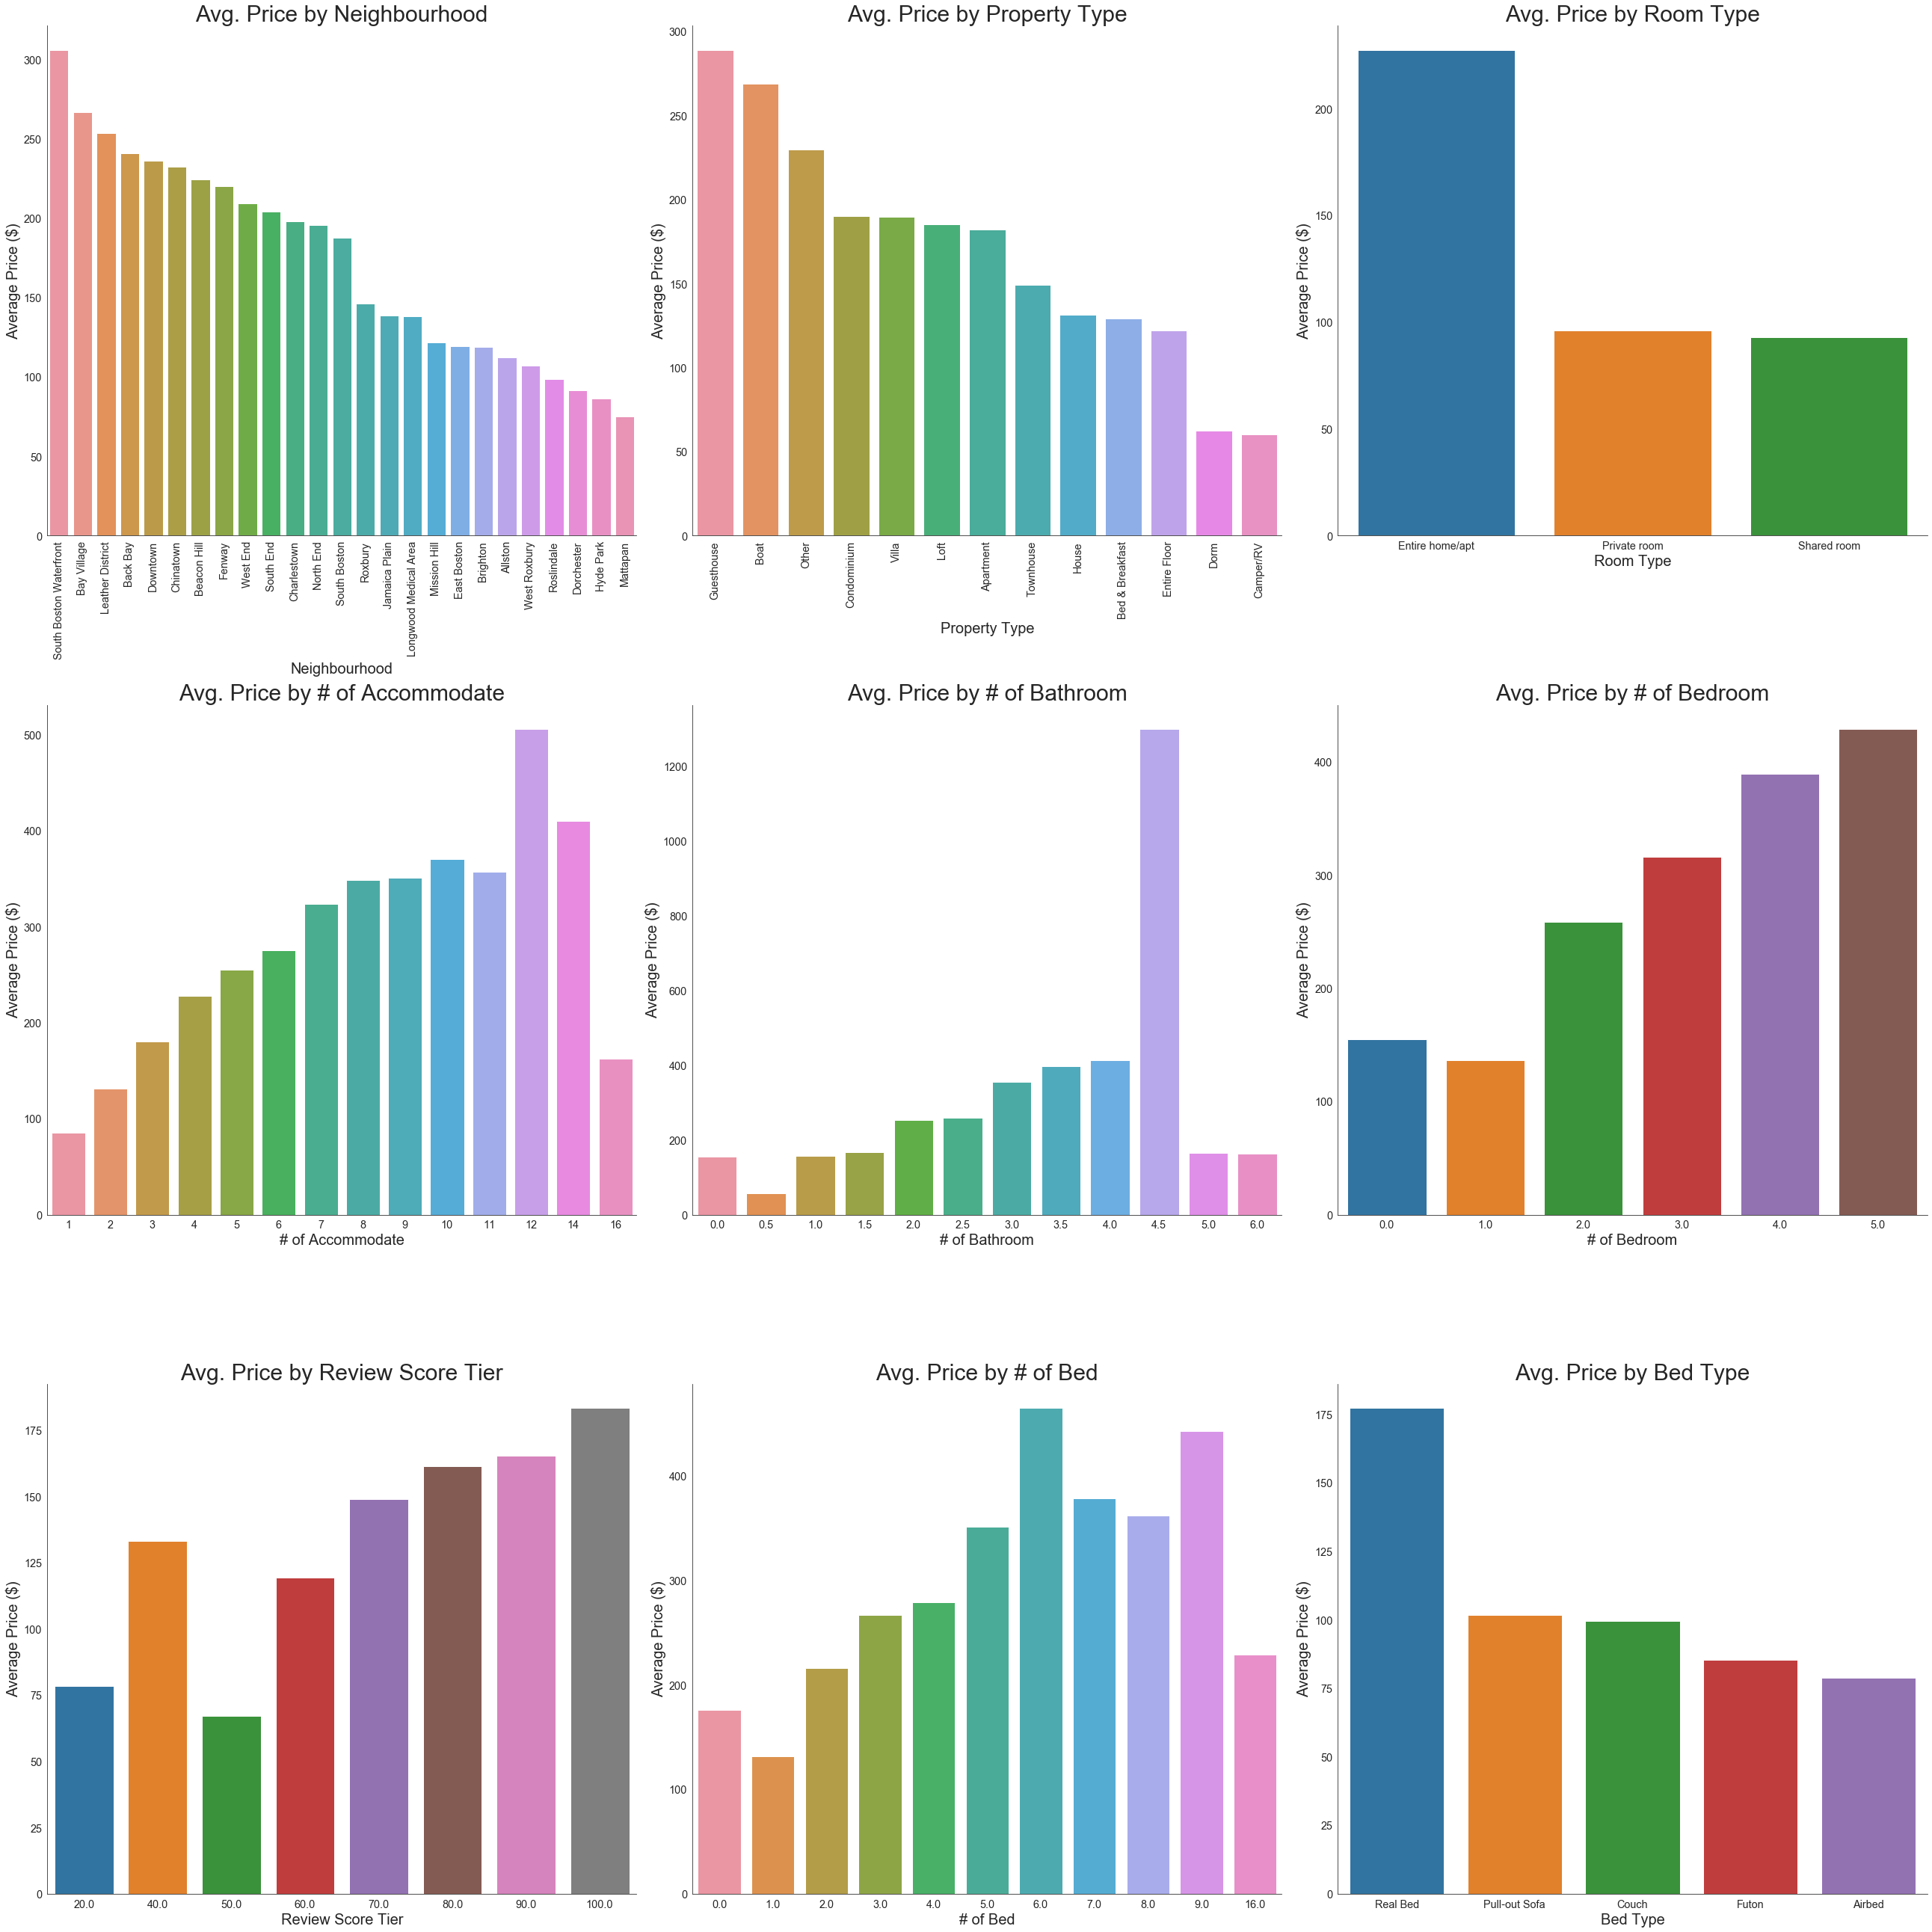

In [12]:
# Plot price vs. factors
fig, axs = plt.subplots(3,3, figsize = (36,36))

# axs[0,0]
sns.barplot(x="neighbourhood_cleansed", 
            y="avg_price", 
            ax = axs[0,0],
            data=df_listing_factor.groupby('neighbourhood_cleansed')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[0,0].set_title('Avg. Price by Neighbourhood',size=30)
axs[0,0].set_xlabel('Neighbourhood',size=20)
axs[0,0].set_ylabel('Average Price ($)',size=20)
axs[0,0].tick_params(labelsize='x-large')
axs[0,0].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
sns.despine()

# axs[0,1]
sns.barplot(x="property_type", 
            y="avg_price", 
            ax = axs[0,1],
            data=df_listing_factor.groupby('property_type')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[0,1].set_title('Avg. Price by Property Type',size=30)
axs[0,1].set_xlabel('Property Type',size=20)
axs[0,1].set_ylabel('Average Price ($)',size=20)
axs[0,1].tick_params(labelsize='x-large')
axs[0,1].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
sns.despine()

# axs[0,2]
sns.barplot(x="room_type", 
            y="avg_price", 
            ax = axs[0,2],
            data=df_listing_factor.groupby('room_type')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[0,2].set_title('Avg. Price by Room Type',size=30)
axs[0,2].set_xlabel('Room Type',size=20)
axs[0,2].set_ylabel('Average Price ($)',size=20)
axs[0,2].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[1,0]
sns.barplot(x="accommodates", 
            y="avg_price", 
            ax = axs[1,0],
            data=df_listing_factor.groupby('accommodates')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[1,0].set_title('Avg. Price by # of Accommodate',size=30)
axs[1,0].set_xlabel('# of Accommodate',size=20)
axs[1,0].set_ylabel('Average Price ($)',size=20)
axs[1,0].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[1,1]
sns.barplot(x="bathrooms", 
            y="avg_price", 
            ax = axs[1,1],
            data=df_listing_factor.groupby('bathrooms')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[1,1].set_title('Avg. Price by # of Bathroom',size=30)
axs[1,1].set_xlabel('# of Bathroom',size=20)
axs[1,1].set_ylabel('Average Price ($)',size=20)
axs[1,1].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[1,2]
sns.barplot(x="bedrooms", 
            y="avg_price", 
            ax = axs[1,2],
            data=df_listing_factor.groupby('bedrooms')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[1,2].set_title('Avg. Price by # of Bedroom',size=30)
axs[1,2].set_xlabel('# of Bedroom',size=20)
axs[1,2].set_ylabel('Average Price ($)',size=20)
axs[1,2].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[2,0]
sns.barplot(x="review_scores_rating_tier", 
            y="avg_price", 
            ax = axs[2,0],
            data=df_listing_factor.groupby('review_scores_rating_tier')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[2,0].set_title('Avg. Price by Review Score Tier',size=30)
axs[2,0].set_xlabel('Review Score Tier',size=20)
axs[2,0].set_ylabel('Average Price ($)',size=20)
axs[2,0].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[2,1]
sns.barplot(x="beds", 
            y="avg_price", 
            ax = axs[2,1],
            data=df_listing_factor.groupby('beds')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[2,1].set_title('Avg. Price by # of Bed',size=30)
axs[2,1].set_xlabel('# of Bed',size=20)
axs[2,1].set_ylabel('Average Price ($)',size=20)
axs[2,1].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[2,2]
sns.barplot(x="bed_type", 
            y="avg_price", 
            ax = axs[2,2],
            data=df_listing_factor.groupby('bed_type')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False))

axs[2,2].set_title('Avg. Price by Bed Type',size=30)
axs[2,2].set_xlabel('Bed Type',size=20)
axs[2,2].set_ylabel('Average Price ($)',size=20)
axs[2,2].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine();

In [13]:
df_listing_factor.groupby('room_type')['price'].mean().reset_index(name='avg_price').sort_values(by='avg_price',ascending=False)

,room_type,avg_price
0,Entire home/apt,227.436765
1,Private room,96.041364
2,Shared room,92.762500


### _Conclusion 1_

From above graphs, we can tell price is related to **neighbourhoods**, **property**/**room**/**bed types**, **# of accommodates**/**bedrooms**/**bathrooms**/**beds** and **review scores**.

Also we can see the highest average price for each categories: 
* <ins>Neighbourhood</ins>: __South Boston Waterfront__
* <ins>Property Type</ins>: __Guesthouse__
* <ins>Room Type</ins>: __Entire home/apt__
* <ins>Bed Type</ins>: __Real Bed__
* <ins># of Accommodate</ins>: __12__
* <ins># of Bedroom</ins>: __5__
* <ins># of Bathroom</ins>: __4.5__
* <ins># of Bed</ins>: __6__
* <ins>Review Score</ins>: __100__



### 2. How competitive is the market based on your neighbourhood, property type and room type?

#### Data Cleaning

In [14]:
# Drop dups in df_calendar
df_calendar = df_calendar.drop_duplicates()

# Convert date column type to datetime
df_calendar['date'] = df_calendar['date'].astype('datetime64[ns]')

# Convert price column type to float and drop $ sign
df_calendar['price'] = df_calendar['price'].astype('str')
df_calendar['price'] = df_calendar['price'].map(lambda p: float(p.replace('$', '').replace(',','')))

# Select useful columns in df_listing
df_listing_type = df_listing[['id','neighbourhood_cleansed','property_type','room_type']]

# Join df_listing_type and df_calendar
df_cal_type = df_calendar.merge(df_listing_type,how='left',left_on='listing_id',right_on='id')

# Drop nulls
df_cal_type.dropna(axis=0, subset=['property_type'], inplace=True)

# Select only available days for listings
df_cal_type = df_cal_type[df_cal_type['available']=='t']

df_cal_type.head()

,listing_id,date,available,price,id,neighbourhood_cleansed,property_type,room_type
365,3075044,2017-08-22,t,65.0,3075044,Roslindale,Apartment,Private room
366,3075044,2017-08-21,t,65.0,3075044,Roslindale,Apartment,Private room
367,3075044,2017-08-20,t,65.0,3075044,Roslindale,Apartment,Private room
368,3075044,2017-08-19,t,75.0,3075044,Roslindale,Apartment,Private room
369,3075044,2017-08-18,t,75.0,3075044,Roslindale,Apartment,Private room


In [15]:
df_cal_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642809 entries, 365 to 1308514
Data columns (total 8 columns):
listing_id                642809 non-null int64
date                      642809 non-null datetime64[ns]
available                 642809 non-null object
price                     642809 non-null float64
id                        642809 non-null int64
neighbourhood_cleansed    642809 non-null object
property_type             642809 non-null object
room_type                 642809 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 44.1+ MB


### Average Daily Available Listings

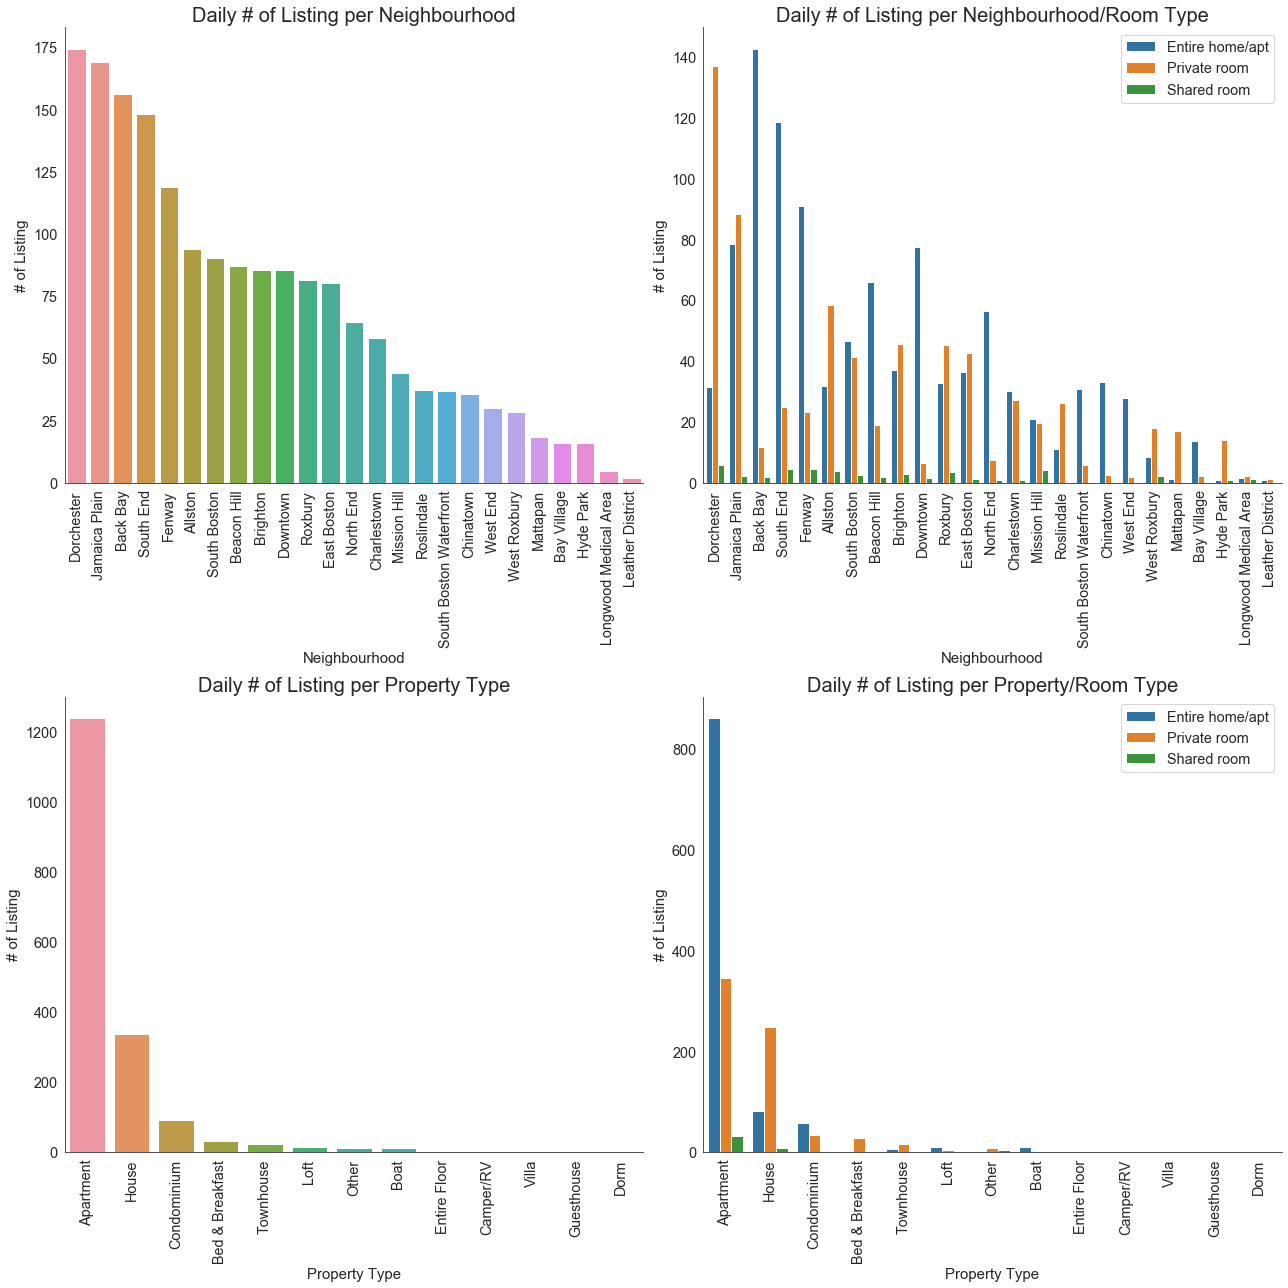

In [16]:
fig, axs = plt.subplots(2,2, figsize = (18,18))

# Axs[0,0]
sns.barplot(x = "neighbourhood_cleansed", 
            y = "listing_per_day", 
            ax = axs[0,0],
            data = (df_cal_type.groupby(['neighbourhood_cleansed'])['available'].count()/365).reset_index(name='listing_per_day').sort_values(by='listing_per_day',ascending=False))

axs[0,0].set_title('Daily # of Listing per Neighbourhood',size=20)
axs[0,0].set_xlabel('Neighbourhood',size=15)
axs[0,0].set_ylabel('# of Listing',size=15)
axs[0,0].tick_params(labelsize='x-large')
axs[0,0].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
sns.despine()

# Axes[0,1]
sns.barplot(x = "neighbourhood_cleansed", 
            y = "listing_per_day", 
            ax = axs[0,1],
            hue = 'room_type',
            order = (df_cal_type.groupby(['neighbourhood_cleansed']).count()['available']/365).reset_index(name='listing_per_day').sort_values(by='listing_per_day',ascending=False).neighbourhood_cleansed.to_list(),
            data = (df_cal_type.groupby(['neighbourhood_cleansed','room_type'])['available'].count()/365).reset_index(name='listing_per_day').sort_values(by='listing_per_day',ascending=False))

axs[0,1].set_title('Daily # of Listing per Neighbourhood/Room Type',size=20)
axs[0,1].set_xlabel('Neighbourhood',size=15)
axs[0,1].set_ylabel('# of Listing',size=15)
axs[0,1].tick_params(labelsize='x-large')
axs[0,1].tick_params(axis='x', labelrotation=90)
axs[0,1].legend(loc='upper right',fontsize = 'x-large')
plt.tight_layout()
sns.despine()

# Axs[1,0]
sns.barplot(x = "property_type", 
            y = "listing_per_day", 
            ax = axs[1,0],
            data = (df_cal_type.groupby(['property_type'])['available'].count()/365).reset_index(name='listing_per_day').sort_values(by='listing_per_day',ascending=False))

axs[1,0].set_title('Daily # of Listing per Property Type',size=20)
axs[1,0].set_xlabel('Property Type',size=15)
axs[1,0].set_ylabel('# of Listing',size=15)
axs[1,0].tick_params(labelsize='x-large')
axs[1,0].tick_params(axis='x', labelrotation=90)
plt.tight_layout()
sns.despine()

# Axes[1,1]
sns.barplot(x = "property_type", 
            y = "listing_per_day", 
            ax = axs[1,1],
            hue = 'room_type',
            order = (df_cal_type.groupby(['property_type']).count()['available']/365).reset_index(name='listing_per_day').sort_values(by='listing_per_day',ascending=False).property_type.to_list(),
            data = (df_cal_type.groupby(['property_type','room_type'])['available'].count()/365).reset_index(name='listing_per_day').sort_values(by='listing_per_day',ascending=False))

axs[1,1].set_title('Daily # of Listing per Property/Room Type',size=20)
axs[1,1].set_xlabel('Property Type',size=15)
axs[1,1].set_ylabel('# of Listing',size=15)
axs[1,1].tick_params(labelsize='x-large')
axs[1,1].tick_params(axis='x', labelrotation=90)
axs[1,1].legend(loc='upper right',fontsize = 'x-large')
plt.tight_layout()
sns.despine()

### _Conclusion 2.1_

Above graphs __ONLY__ describe the __supply side__ situation for Airbnb Boston area. 

The top 3 popular (most listings per day) _neighbourhoods_ are: **Dorchester**, **Jamaica Plain** and **Back Bay**. 

The room type distribution for the top 3 neighbourhoods is interesting. All 3 neighbourhoods has low number of __Shared Room__. However, **Dorchester** has more __Private Room__. **Jamaica Plain** has almost even __Private Room__ and __Entire Home/Apt__. And **Back Bay** has more __Shared Room__.

The most popular _property types_ are: **Apartment**, **House** and **Condominium**. 

It seems that **Apartment** hosts tend to rent out the __Entire Home/Apt__ while **House** hosts are more likely rent out __Private Room__ in the house.

### Daily Available Listings

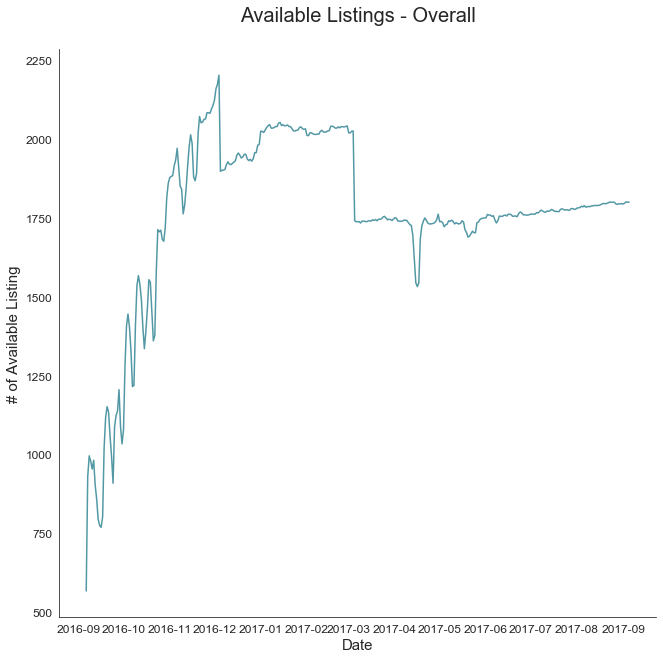

In [17]:
fig, ax = plt.subplots(figsize = (9,9))
sns.lineplot(data = df_cal_type.groupby(['date']).count()['available'],
             color = sns.color_palette('viridis')[2],
             alpha = 0.8)

#df_cal_type.groupby(['date']).count()['available'].reset_index(name="count").plot()
plt.title('Available Listings - Overall\n', size=20)
plt.tight_layout()
plt.xlabel('Date',size=15)
plt.ylabel('# of Available Listing',size=15)
ax.tick_params(labelsize='large')
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months);
sns.despine()

### Daily Avaiable Listing by Property Type

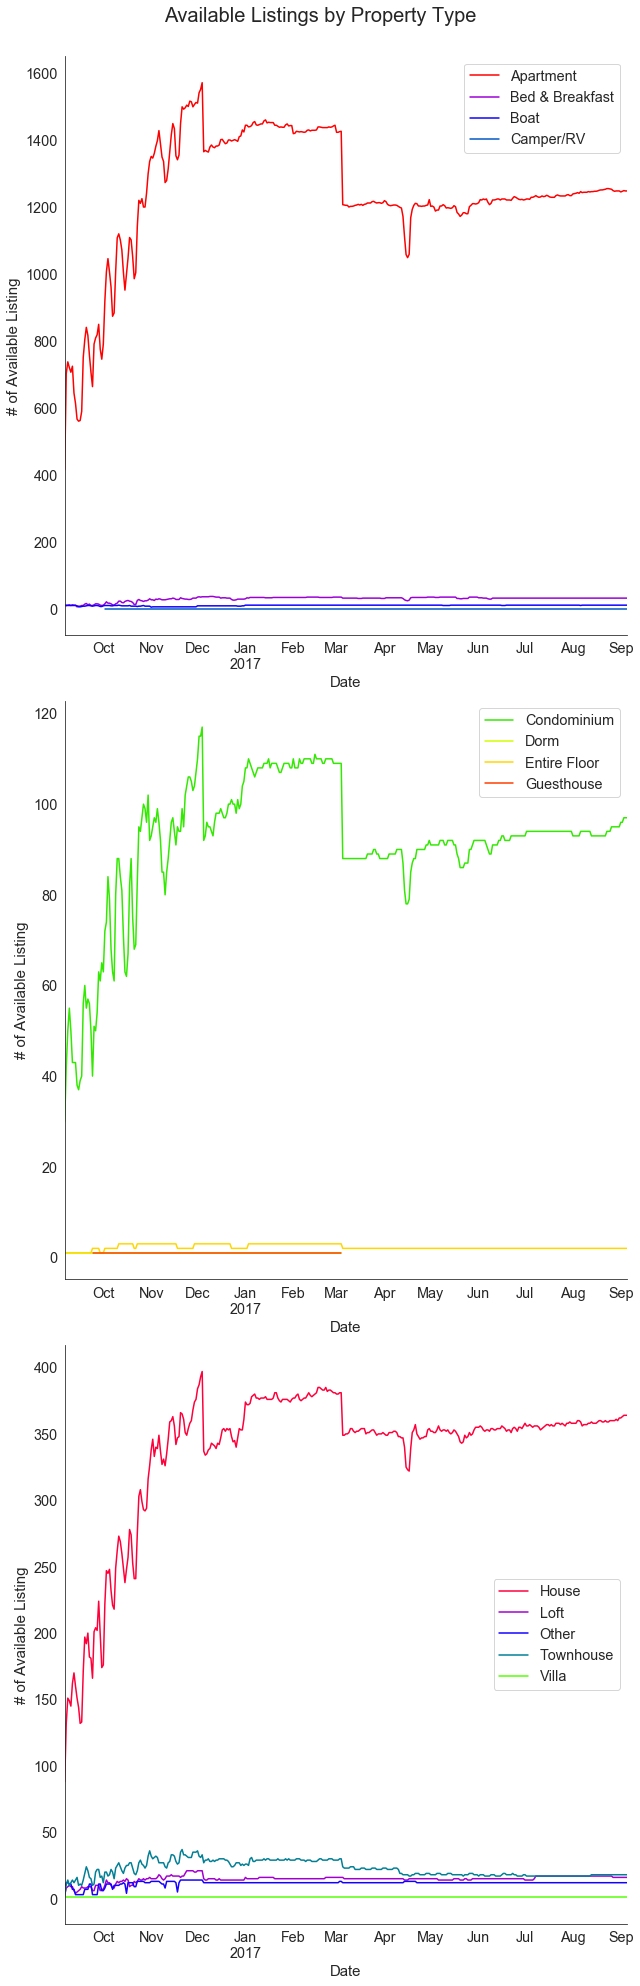

In [18]:
fig, axs = plt.subplots(3, 1, figsize=(9, 27))

color = iter(plt.cm.prism(np.linspace(0,1,df_cal_type.property_type.nunique())))
property_type_list = list(df_cal_type.property_type.unique())
property_type_list.sort()

fig.suptitle('Available Listings by Property Type',y=1.02,size=20)

# axs[0]
for property_type in property_type_list[:4]:
    c = next(color)
    df_cal_type[df_cal_type['property_type']==property_type].groupby('date')['listing_id'].count().plot(ax=axs[0],c=c,label=property_type)

axs[0].set_xlabel('Date',size=15)
axs[0].set_ylabel('# of Available Listing',size=15)
axs[0].legend(fontsize = 'x-large')
axs[0].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[1]
for property_type in property_type_list[4:8]:
    c = next(color)
    df_cal_type[df_cal_type['property_type']==property_type].groupby('date')['listing_id'].count().plot(ax=axs[1],c=c,label=property_type)

axs[1].set_xlabel('Date',size=15)
axs[1].set_ylabel('# of Available Listing',size=15)
axs[1].legend(fontsize = 'x-large')
axs[1].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[2]
for property_type in property_type_list[8:]:
    c = next(color)
    df_cal_type[df_cal_type['property_type']==property_type].groupby('date')['listing_id'].count().plot(ax=axs[2],c=c,label=property_type)

axs[2].set_xlabel('Date',size=15)
axs[2].set_ylabel('# of Available Listing',size=15)
axs[2].legend(fontsize = 'x-large')
axs[2].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine();

### Daily Avaiable Listing by Room Type

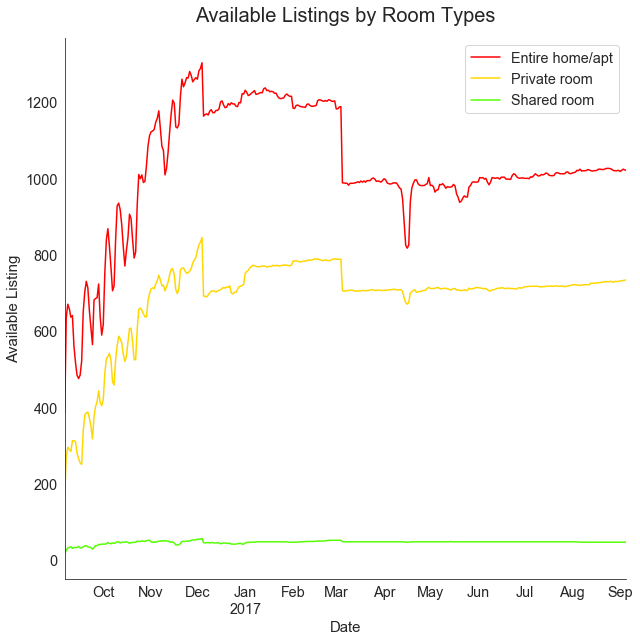

In [19]:
plt.subplots(figsize=(9, 9))

color = iter(plt.cm.prism(np.linspace(0,1,df_cal_type.room_type.nunique())))
room_type_list = list(df_cal_type.room_type.unique())
room_type_list.sort()

for room_type in room_type_list:
    c = next(color)
    df_cal_type[df_cal_type['room_type']==room_type].groupby('date')['listing_id'].count().plot(c=c,label=room_type)

    plt.title('Available Listings by Room Types',y=1.02,size=20)
plt.xlabel('Date',size=15)
plt.ylabel('Available Listing',size=15)
plt.legend(fontsize = 'x-large')
plt.tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

### _Conclusion 2.2_

The above graphs show each days' # of listings for each property type from September 2016 to September 2017. 

Overall, the total listings in Boston increased continuously to ~2200 listings/day at the beginning of December 2016 and then slightly decreased and became stable at 1750 listings/day until mid April 2017.

We can see the trend for **Apartment**, **House** and **Condominium** follow the overall trend and are obviously different than other property types which remained stable at lower supply.

### Daily Avaiable Listing by Neighbourhood

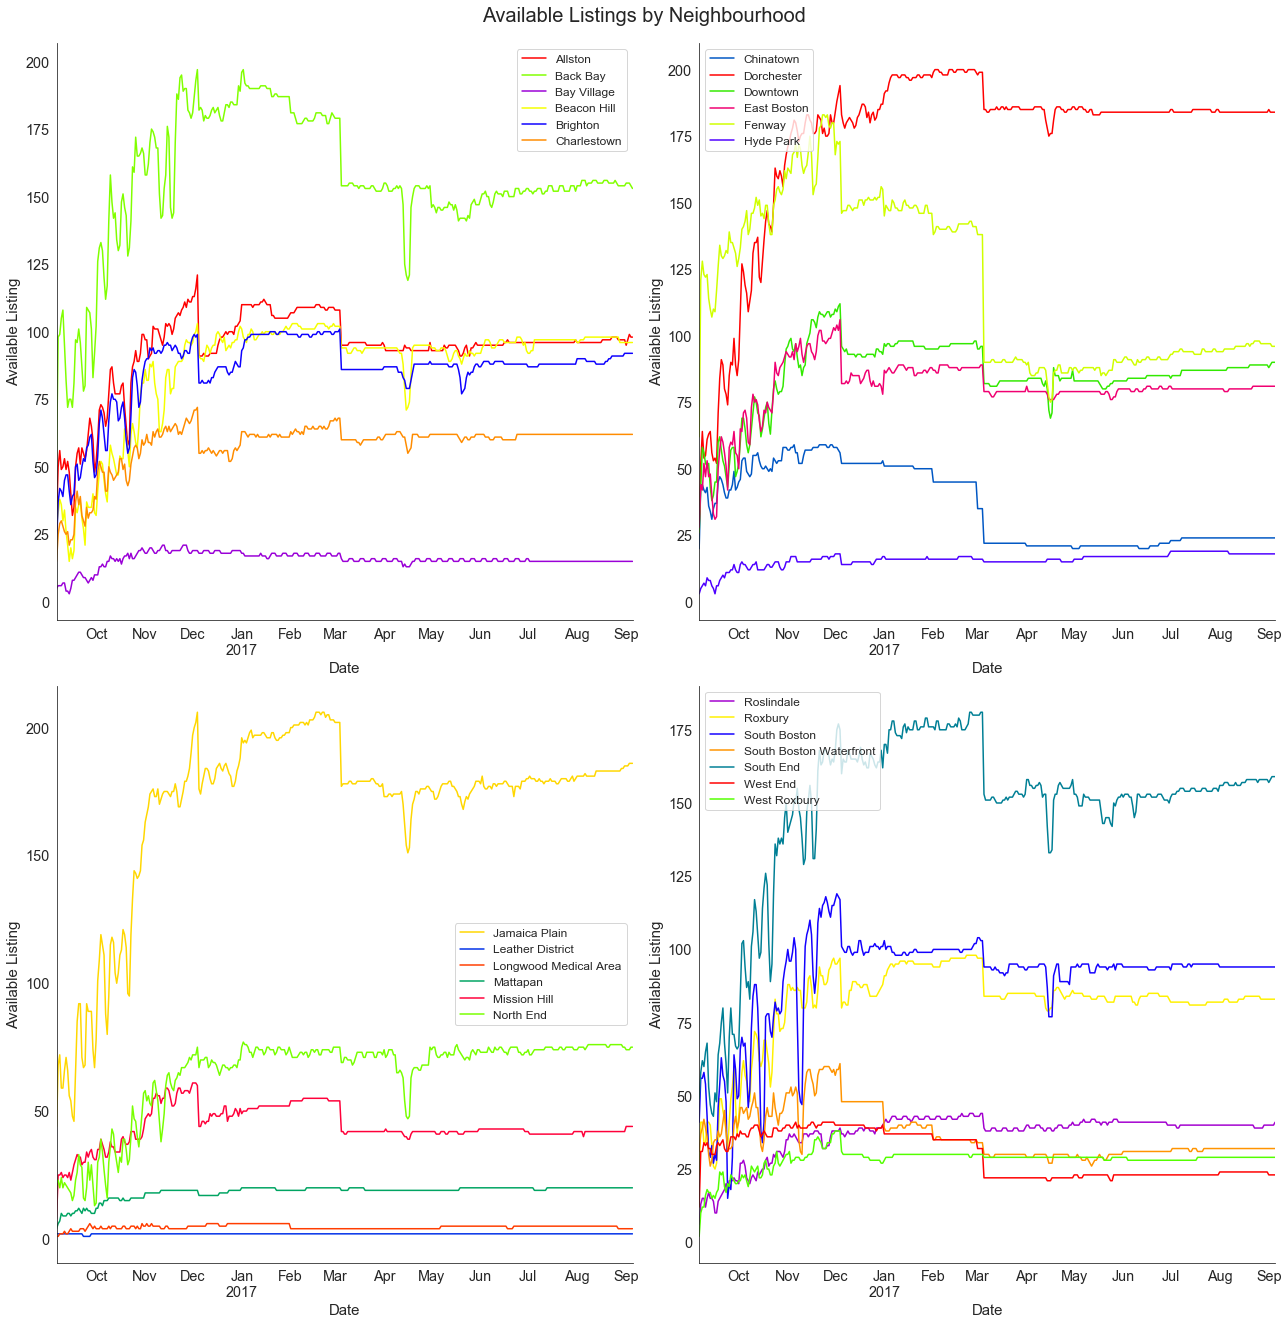

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

color = iter(plt.cm.prism(np.linspace(0,1,df_cal_type.neighbourhood_cleansed.nunique())))
neighbourhood_list = list(df_cal_type.neighbourhood_cleansed.unique())
neighbourhood_list.sort()

fig.suptitle('Available Listings by Neighbourhood',y=1.02,size=20)

# axs[0, 0]
for neighbourhood_cleansed in neighbourhood_list[:6]:
    c = next(color)
    df_cal_type[df_cal_type['neighbourhood_cleansed']==neighbourhood_cleansed].groupby('date')['listing_id'].count().plot(ax=axs[0,0],c=c,label=neighbourhood_cleansed)

axs[0, 0].set_xlabel('Date',size=15)
axs[0, 0].set_ylabel('Available Listing',size=15)
axs[0, 0].legend(fontsize = 'large')
axs[0, 0].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[0, 1]
for neighbourhood_cleansed in neighbourhood_list[6:12]:
    c = next(color)
    df_cal_type[df_cal_type['neighbourhood_cleansed']==neighbourhood_cleansed].groupby('date')['listing_id'].count().plot(ax=axs[0,1],c=c,label=neighbourhood_cleansed)

axs[0, 1].set_xlabel('Date',size=15)
axs[0, 1].set_ylabel('Available Listing',size=15)
axs[0, 1].legend(loc='best',fontsize = 'large')
axs[0, 1].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[1, 0]
for neighbourhood_cleansed in neighbourhood_list[12:18]:
    c = next(color)
    df_cal_type[df_cal_type['neighbourhood_cleansed']==neighbourhood_cleansed].groupby('date')['listing_id'].count().plot(ax=axs[1,0],c=c,label=neighbourhood_cleansed)

axs[1, 0].set_xlabel('Date',size=15)
axs[1, 0].set_ylabel('Available Listing',size=15)
axs[1, 0].legend(loc='best',fontsize = 'large')
axs[1, 0].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine()

# axs[1, 1]
for neighbourhood_cleansed in neighbourhood_list[18:]:
    c = next(color)
    df_cal_type[df_cal_type['neighbourhood_cleansed']==neighbourhood_cleansed].groupby('date')['listing_id'].count().plot(ax=axs[1,1],c=c,label=neighbourhood_cleansed)

axs[1, 1].set_xlabel('Date',size=15)
axs[1, 1].set_ylabel('Available Listing',size=15)
axs[1, 1].legend(loc='best',fontsize = 'large')
axs[1, 1].tick_params(labelsize='x-large')
plt.tight_layout()
sns.despine();

### _Conclusion 2.3_

Each neighbourhood has different supply curve throught the year. 

We discovered the top 3 most popular neighbourhoods are **Dorchester**, **Jamaica Plain** and **Back Bay**. But we can tell from the graphs that the **Back Bay** and **Jamaica Plain**'s supply curves have larger periodic fluctuations than **Dorchester**. 

Also, **Back Bay** and **Jamaica Plain**'s Airbnb hosts showed more obvious seasonal behavior. Potential hosts could take advantage of this and rent out their property when there are less competitors around thier neighbourhood.

### 3. How much should you charge for rent?
#### Data Cleaning

In [21]:
# Select num_vars, cat_vars and price for traning model
df_list_price = df_listing[[# num_vars
                            'accommodates','bathrooms','bedrooms','beds','guests_included',
                            # cat_vars
                            'host_is_superhost','neighbourhood_cleansed','property_type','room_type','bed_type',
                            'instant_bookable','cancellation_policy',
                            # price
                            'price']]

# Drop nulls
df_list_price.dropna(axis=0, inplace=True)

# Convert price column type to float and drop $ sign
df_list_price['price'] = df_list_price['price'].astype('str')
df_list_price['price'] = df_list_price['price'].apply(lambda p: float(p.replace('$', '').replace(',','')))

df_list_price.head(3)

,accommodates,bathrooms,bedrooms,beds,guests_included,host_is_superhost,neighbourhood_cleansed,property_type,room_type,bed_type,instant_bookable,cancellation_policy,price
0,4,1.5,2.0,3.0,1,f,Roslindale,House,Entire home/apt,Real Bed,f,moderate,250.0
1,2,1.0,1.0,1.0,0,f,Roslindale,Apartment,Private room,Real Bed,t,moderate,65.0
2,2,1.0,1.0,1.0,1,t,Roslindale,Apartment,Private room,Real Bed,f,moderate,65.0


In [22]:
df_list_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3554 entries, 0 to 3584
Data columns (total 13 columns):
accommodates              3554 non-null int64
bathrooms                 3554 non-null float64
bedrooms                  3554 non-null float64
beds                      3554 non-null float64
guests_included           3554 non-null int64
host_is_superhost         3554 non-null object
neighbourhood_cleansed    3554 non-null object
property_type             3554 non-null object
room_type                 3554 non-null object
bed_type                  3554 non-null object
instant_bookable          3554 non-null object
cancellation_policy       3554 non-null object
price                     3554 non-null float64
dtypes: float64(4), int64(2), object(7)
memory usage: 388.7+ KB


### Model to estimate property rent

In [23]:
# Clean and prepare data to be model fitting
def clean_data(df):
    y = df['price']
    df = df.drop(['price'], axis=1)
        
    # Dummy the categorical variables
    cat_vars = ['host_is_superhost','neighbourhood_cleansed','property_type','room_type','bed_type','instant_bookable','cancellation_policy']
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
# Use the function to create X and y
X, y = clean_data(df_list_price)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

#### Linear Regression Model

In [24]:
## Train and evaluate LinearRegression model
# Only use num_vars 
num_vars = ['accommodates','bathrooms','bedrooms','beds','guests_included']

# Instantiate
lm_model = LinearRegression(normalize=True) 

# Fit
lm_model.fit(X_train[num_vars], y_train) 

# Predict 
y_test_preds = lm_model.predict(X_test[num_vars]) 
y_train_preds = lm_model.predict(X_train[num_vars]) 

# Evaluate model prediction
print("The Mean Absolute Error (MAE) on the training data was {}. \nThe Mean Absolute Error (MAE) on the test data was {}.".format(mean_absolute_error(y_train,y_train_preds),mean_absolute_error(y_test,y_test_preds)))
print("The rsquared on the training data was {}. \nThe rsquared on the test data was {}.".format(r2_score(y_train,y_train_preds),r2_score(y_test,y_test_preds)))

The Mean Absolute Error (MAE) on the training data was 70.85386123880794. 
The Mean Absolute Error (MAE) on the test data was 74.6665785303707.
The rsquared on the training data was 0.25303086731465996. 
The rsquared on the test data was 0.13607125489043603.


#### Random Forest Model

In [25]:
## Train and evaluate RandomForestRegressor model
# Instantiate
rf_model = RandomForestRegressor(n_estimators=100,random_state=42) 
# Fit
rf_model.fit(X_train, y_train) 
# Predict 
y_test_preds = rf_model.predict(X_test) 
y_train_preds = rf_model.predict(X_train) 

# Evaluate model prediction
print("The Mean Absolute Error (MAE) on the training data was {}. \nThe Mean Absolute Error (MAE) on the test data was {}.".format(mean_absolute_error(y_train,y_train_preds),mean_absolute_error(y_test,y_test_preds)))
print("The rsquared on the training data was {}. \nThe rsquared on the test data was {}.".format(r2_score(y_train,y_train_preds),r2_score(y_test,y_test_preds)))

The Mean Absolute Error (MAE) on the training data was 26.79897932900687. 
The Mean Absolute Error (MAE) on the test data was 55.733218801206874.
The rsquared on the training data was 0.7900733037157937. 
The rsquared on the test data was 0.13711039567235594.


### Predict own home rent

In [26]:
# Input housing features to be estimated
X_ownhouse = pd.DataFrame([[8,4,4,6,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0]],columns = X_train.columns)

In [27]:
X_ownhouse.head()

,accommodates,bathrooms,bedrooms,beds,guests_included,host_is_superhost_t,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30
0,8,4,4,6,6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0


In [28]:
# Predict my own house price
own_house_price = rf_model.predict(X_ownhouse) 
print('Based on the feature inputs, your estimated house rent price is ${}/day'.format(float(own_house_price)))

Based on the feature inputs, your estimated house rent price is $348.54/day


### _Conclusion 3_

Prediction using __Random Forest Model__ is more accurate than using Linear Regression Model based on the _Mean Absolute Error_ (__26.80__ vs. __74.67__) and _R^2_ (__0.1371__ vs. __0.1361__).

Using the trained Random Forest Model to predict my house rent price to be __$348.54/day__.

